# Project: Credit Classification

This project is divided into Four Parts. The first three belong to the midcourse project, and the last will be completed in the final project.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data
4. Ensemble Models



## Step 1: Data Prep & EDA

1. Import the data - perform any datatype conversion as necessary
2. Modify the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare your data for modelling. Create dummy variables, split your data into train and test, and scale your features if necessary.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN", "ID", "Customer_ID"], axis=1)
credit_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
credit_df.info() # most columns are already numeric 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

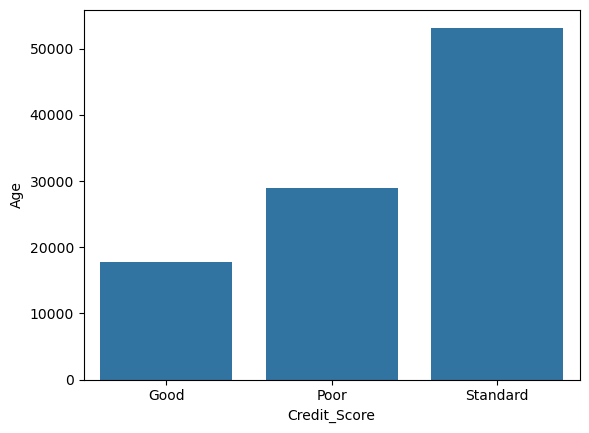

In [4]:
sns.barplot(data=credit_df.groupby('Credit_Score')['Age'].count().reset_index(), x='Credit_Score', y='Age');

In [5]:
credit_df['Credit_Score'] = credit_df['Credit_Score'].map({
    'Good': 'Good or Standard',
    'Standard': 'Good or Standard',
    'Poor': 'Poor'
})

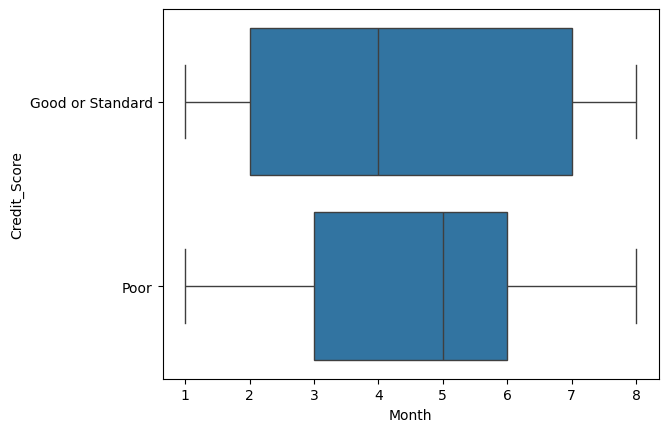

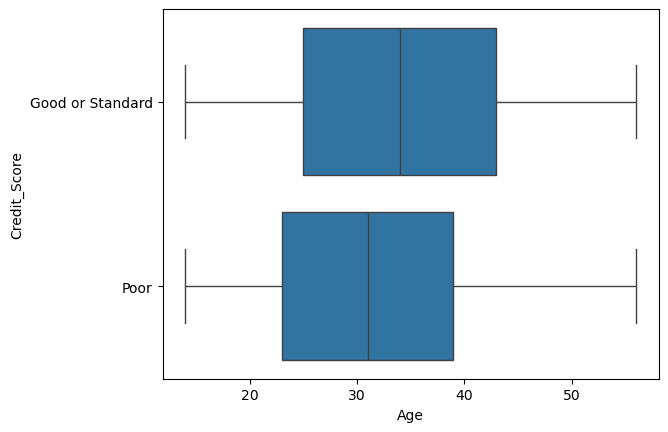

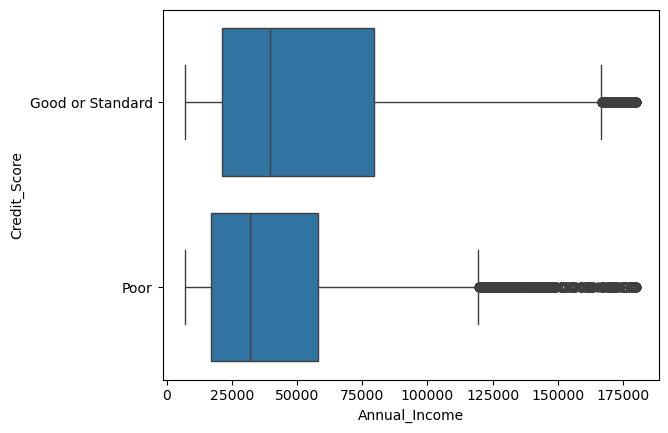

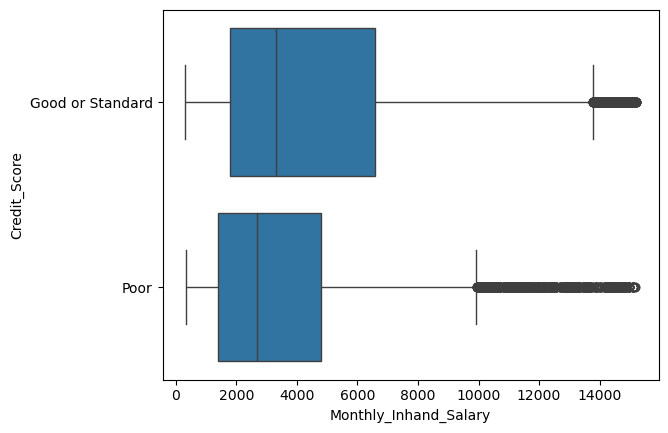

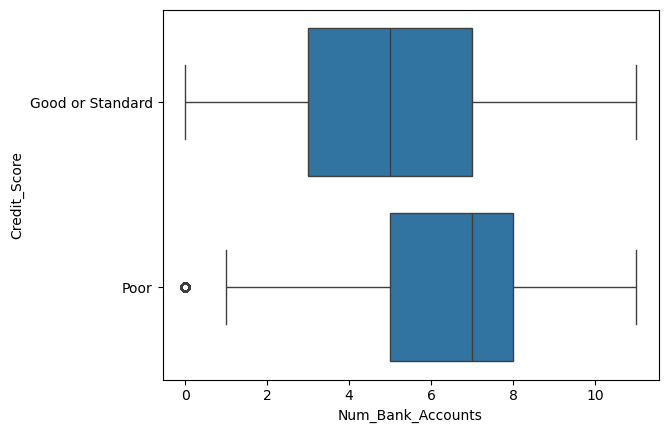

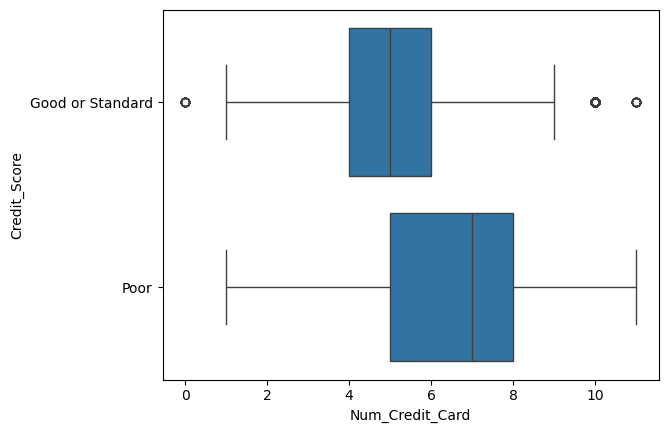

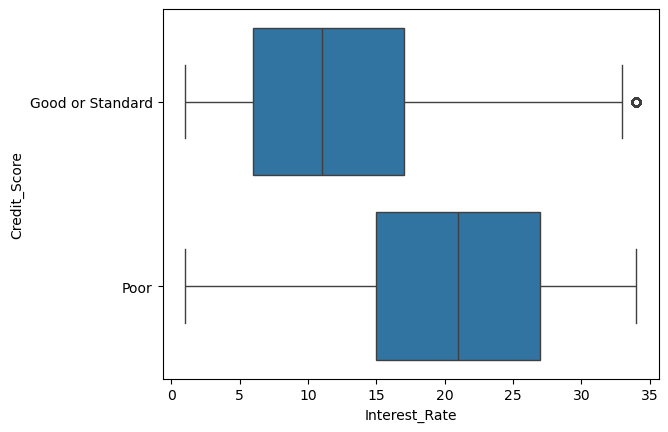

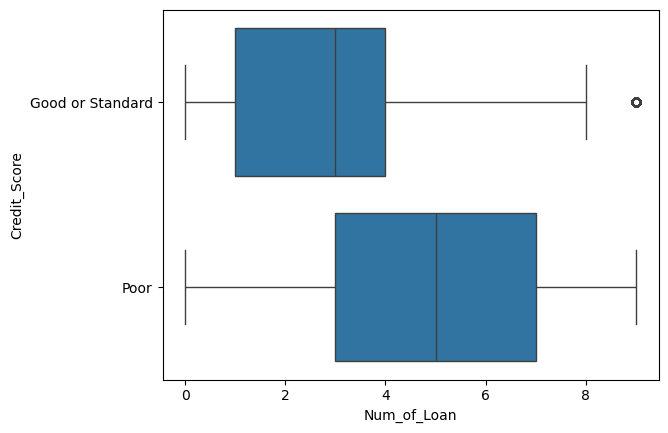

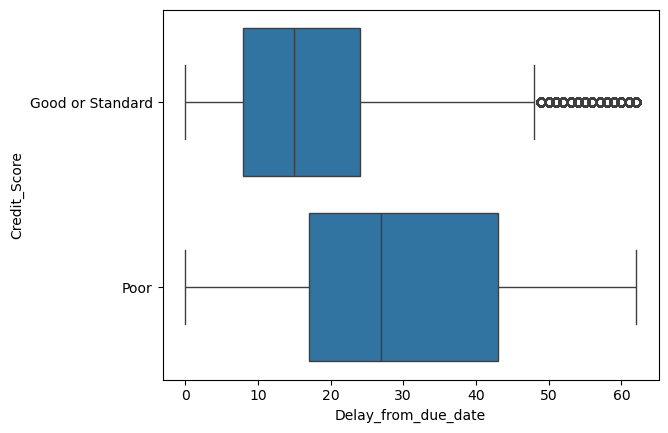

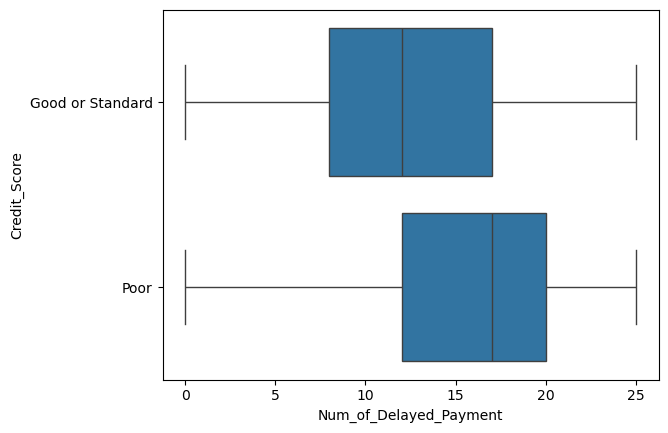

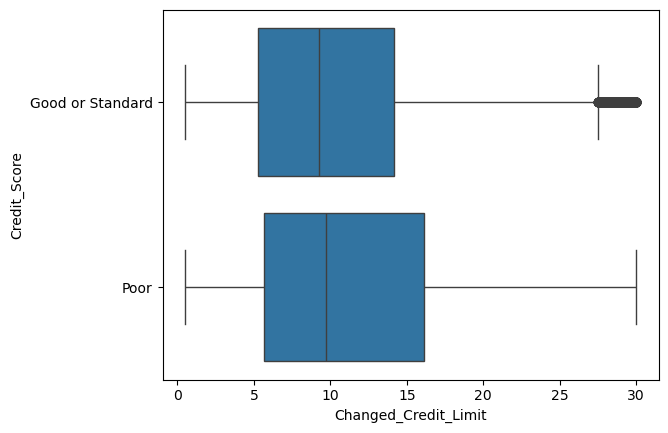

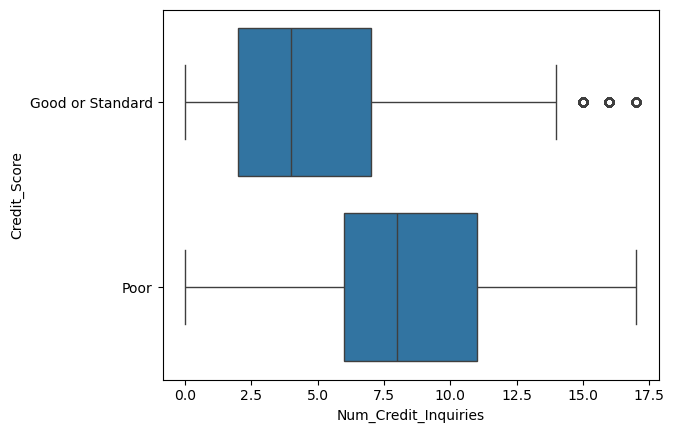

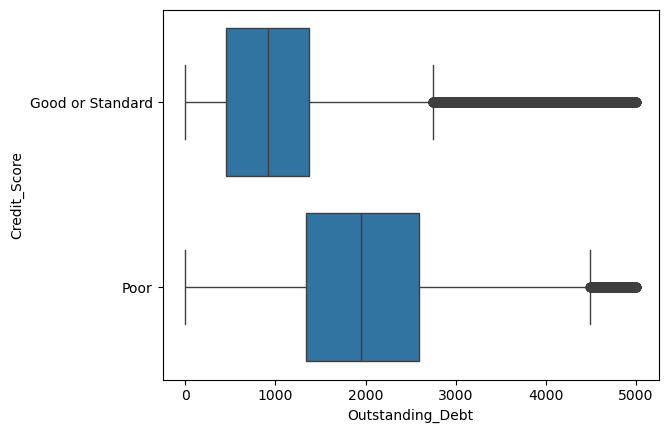

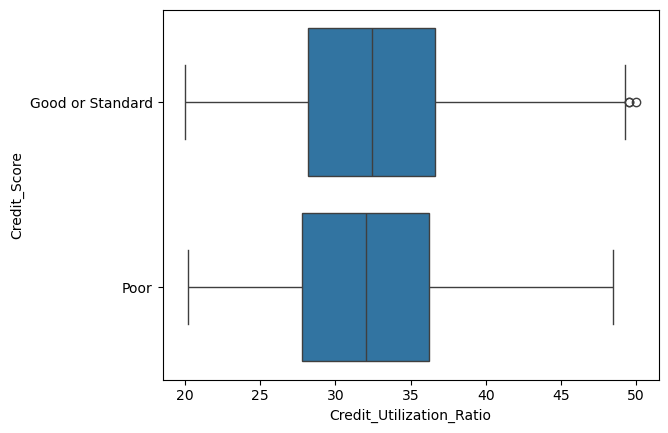

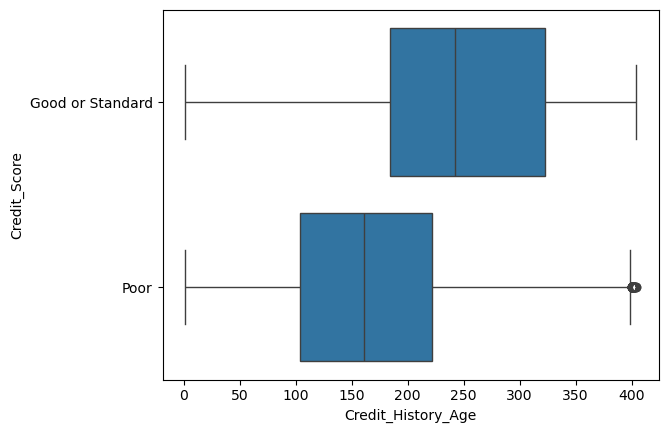

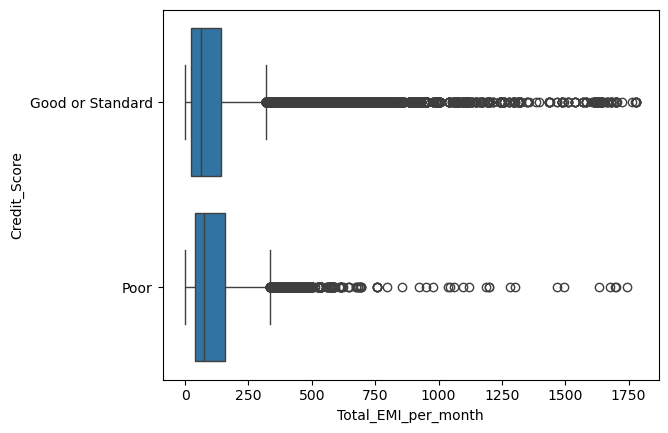

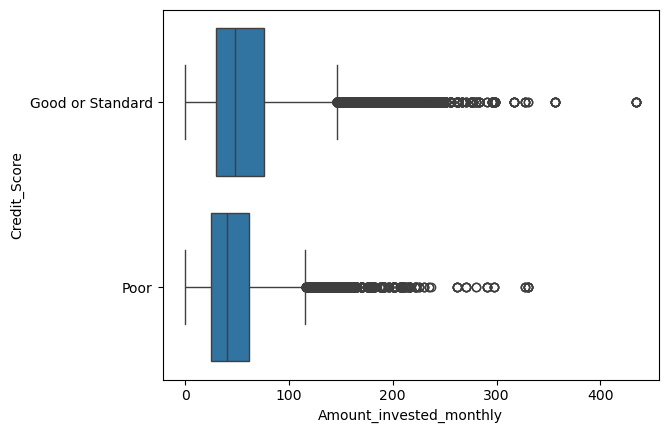

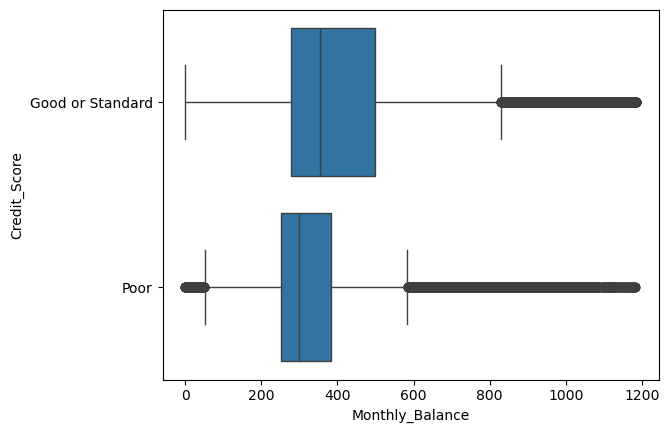

In [6]:
def num_plotter(data, target):
    for col in data.select_dtypes(['int', 'float']):
        sns.boxplot(data=data, x=col, y=target, #stat='percent', kde=True, bins=20
                   )

        plt.show()

num_plotter(credit_df, 'Credit_Score')

In [7]:
credit_df['target'] = credit_df['Credit_Score'].map({
    'Good or Standard': 0,
    'Poor': 1
})

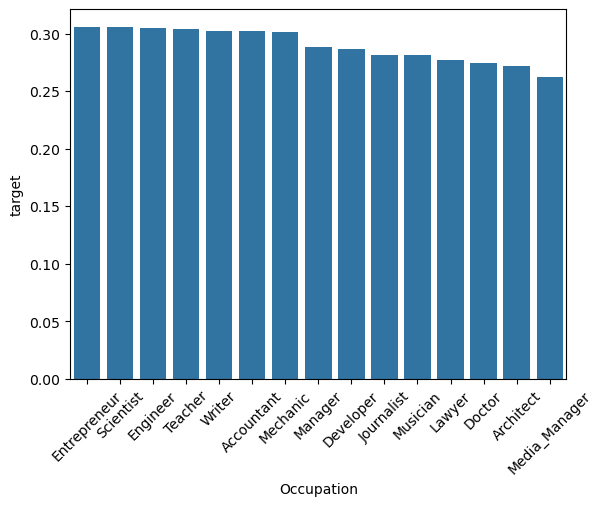

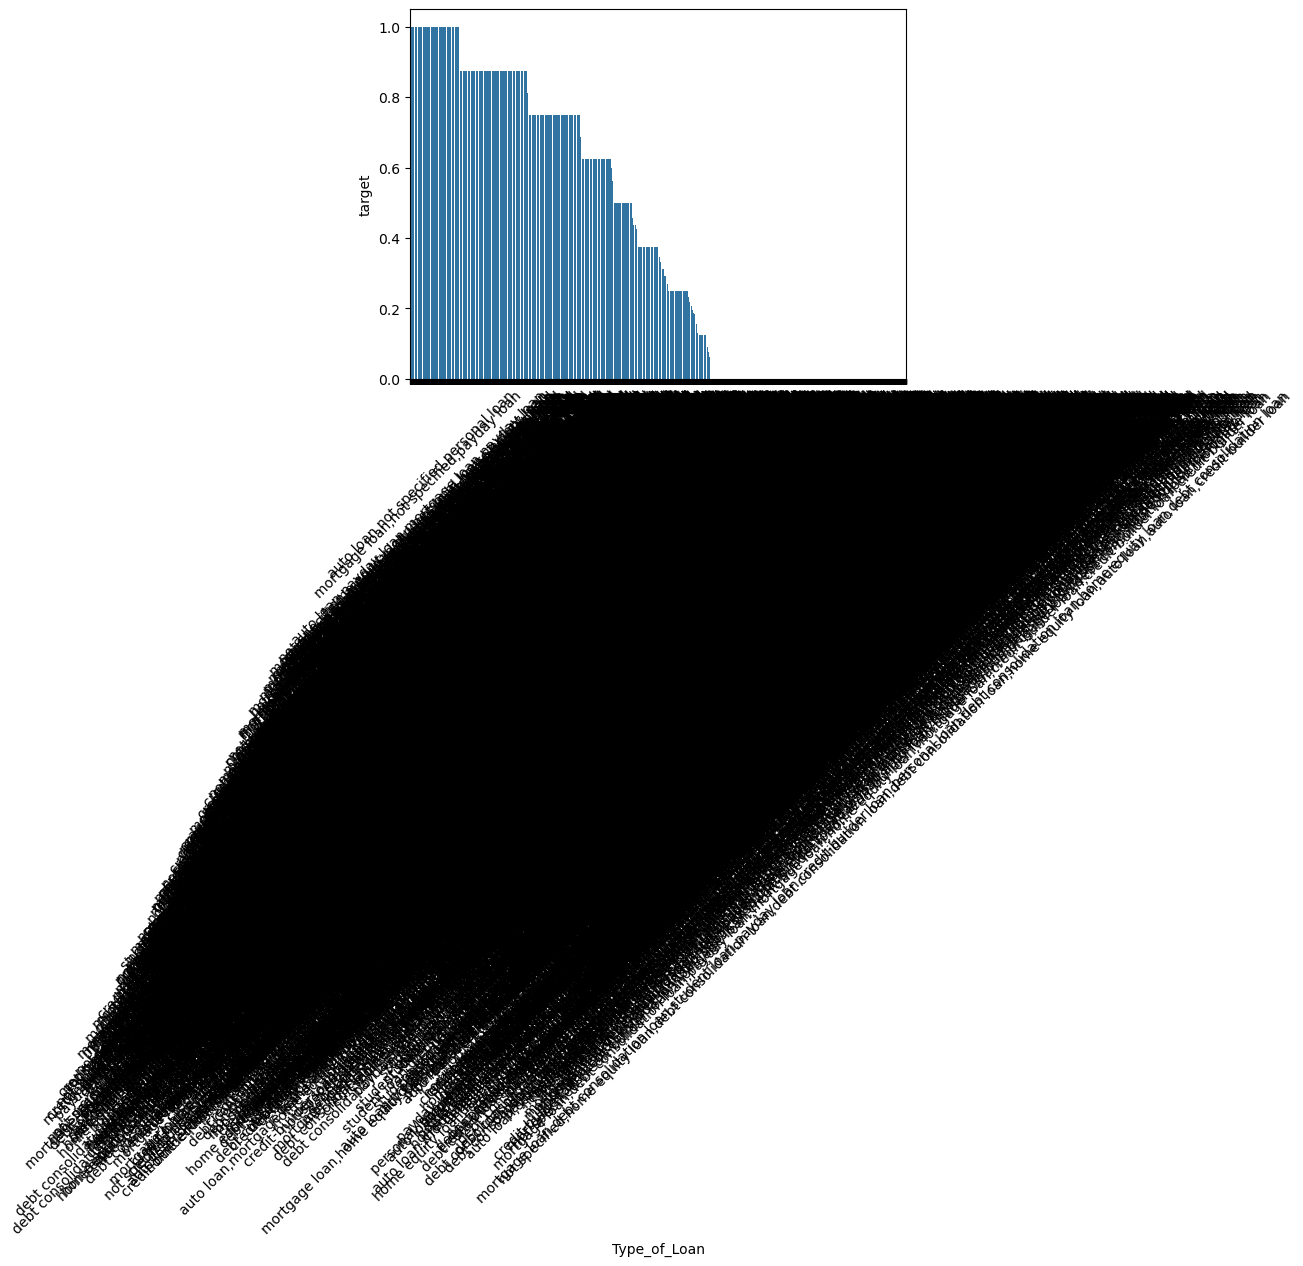

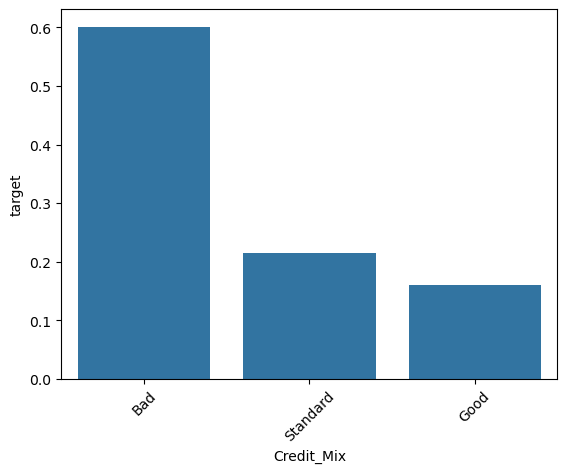

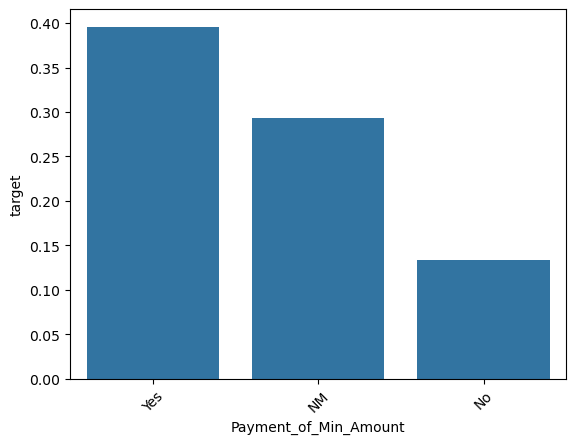

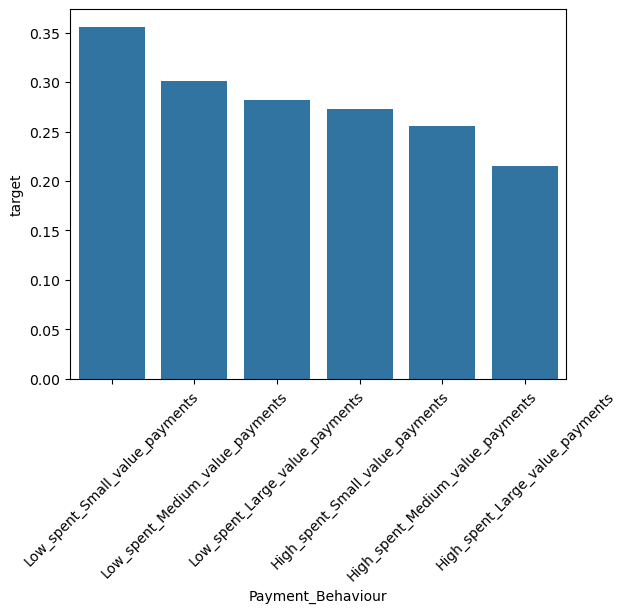

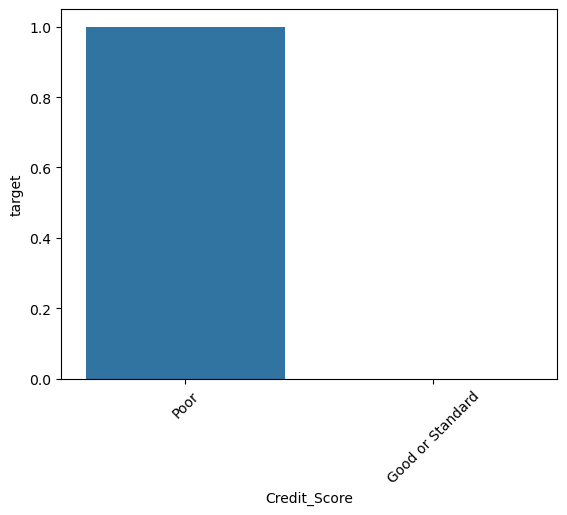

In [8]:
def cat_plotter(data, target):
    for col in data.select_dtypes(['object']).columns:
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({'target': 'mean'})
                .sort_values(by='target', ascending=False)
            ),
            x=col,
            y=target
        )
        plt.xticks(rotation=45)
        plt.show()

cat_plotter(credit_df, 'target')

In [10]:
# Credit Card X Credit Inquiries or Outstanding Debt/Payment Behaviour

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Interest_Rate",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month",
#     "Type_of_Loan", 
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True
                  )
y = credit_df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [11]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Step 2: Logistic Regression

1. Fit a Logistic Regression Model that uses default hyperparameters.
2. Tune the hyperparameters of your logistic regression model
3. Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
4. Plot the ROC curve and report AUC for your tuned model

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.7867125
Test Accuracy: 0.7863


C:\Users\Camilo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': np.linspace(.1, 1.1, 11),
    'penalty': ['l1', 'l2'],
}

gridsearch = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), parameters)
gridsearch.fit(X_train_std, y_train)
gridsearch.best_params_

{'C': 0.30000000000000004, 'penalty': 'l2'}

In [14]:
logreg = LogisticRegression(max_iter=5000, **gridsearch.best_params_)

lr_tuned = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr_tuned.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr_tuned.score(X_test_std, y_test)}")

Train Accuracy: 0.7892
Test Accuracy: 0.7877


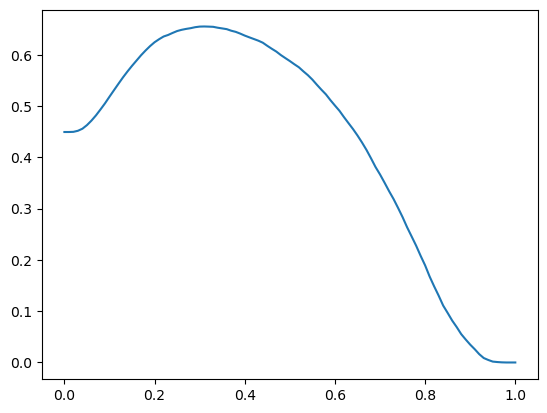

In [15]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred = (lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))

sns.lineplot(x=thresholds, y=f1);

In [16]:
thresh = thresholds[f1.index(max(f1))]
thresh

0.31

In [17]:
preds = lr_tuned.predict_proba(X_test_std)[:,1]>thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.7861
Precision: 0.6165630213863188
Recall: 0.6990541702493551
F1: 0.6552224371373307


In [18]:
confusion_matrix(y_test, preds)

array([[11657,  2528],
       [ 1750,  4065]], dtype=int64)

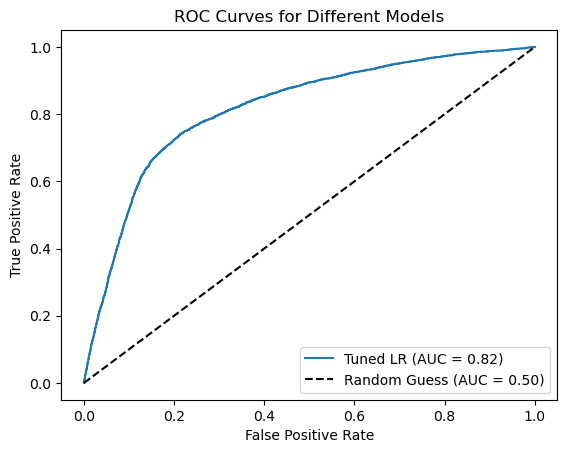

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Step 3. Imbalanced Data Techniques

1. Try using SMOTE, by resampling up to an equal number of 0s and 1s, then tune your model threshold. 
2. Did this improve your model performance in terms of accuracy, F1, and AUC?

In [20]:
import imblearn.over_sampling as OS

smt = OS.SMOTE(
    sampling_strategy='auto',
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train_std, y_train)

In [21]:
logreg = LogisticRegression(max_iter=5000, **gridsearch.best_params_)

lr_smt = logreg.fit(X_train_smt, y_train_smt)

print(f"Train Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")
print(f"Test Accuracy: {lr_smt.score(X_test_std, y_test)}")

Train Accuracy: 0.7622014537902388
Test Accuracy: 0.78145


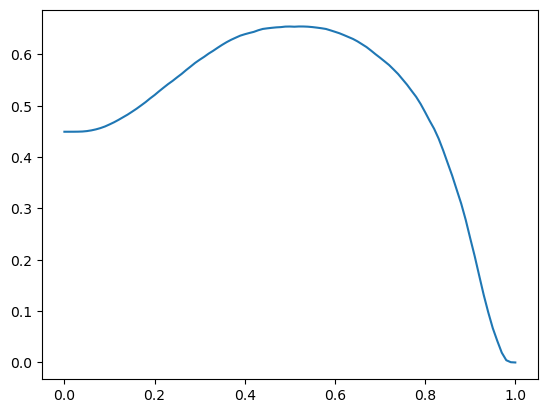

In [23]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred = (lr_smt.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))

sns.lineplot(x=thresholds, y=f1);

In [24]:
thresh = thresholds[f1.index(max(f1))]
thresh

0.52

In [25]:
preds = lr_smt.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.7859
Precision: 0.615315179780352
Recall: 0.70335339638865
F1: 0.6563954421441182


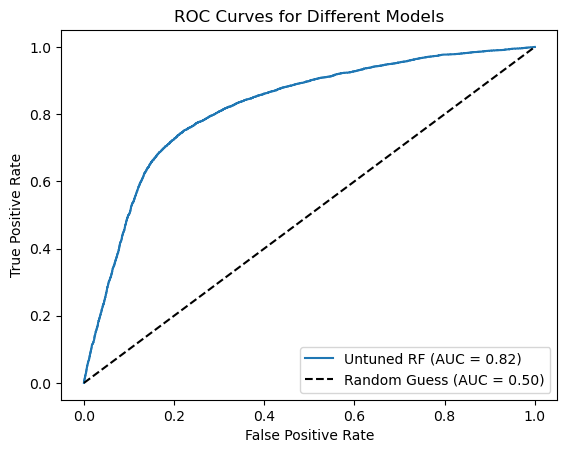

In [26]:
# Generate ROC AUC for smote model
y_probs = lr_smt.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Untuned RF (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Step 4: Ensemble Models

1. Fit & Tune Random Forest and GBM Models
2. Plot the ROC curves for both models
3. Select the model with the best AUC, then tune the threshold to maximize f1, and report final metrics
4. Build a Beeswarm plot of shap values for your final model.